In [10]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from typing import List

In [11]:
#exps_to_load, labels = ["r0", "r0.2", "r0.4", "r0.6", "r0.8", "r1"], ["0%", "20%", "40%", "60%", "80%", "100%"]
#exps_to_load, labels = ["r1", "r1.2", "r1.4", "r1.6", "r1.8", "r2"],  ["100%", "80%", "60%", "40%", "20%", "0%"]
#exps_to_load = ["r1", "r1_long"]
#exps_to_load = ["remove_ant0", "remove_ant0.2", "remove_ant0.4", "remove_ant0.6", "remove_ant0.8", "remove_ant1"]
#labels = ["0%", "20%", "40%", "60%", "80%", "100%"]
#title = "Comparison between number of infill antennas used"
exps_to_load = ["remove_ant1", "remove_ant1.2", "remove_ant1.4", "remove_ant1.6", "remove_ant1.8", "remove_ant2"]
labels = ["100%", "80%", "60%", "40%", "20%", "0%"]
title = "Comparison between number of coarse antennas used"

In [12]:
exps_to_load_infill = [f"dense_max{i/10}" for i in range(0+2, 11, 2)]
labels_infill = [f"{i*10}%" for i in range(0+2, 11, 2)]
title_infill = "Comparison between number of infill antennas used"
exps_to_load_coarse = [f"dense_max{i/10}" for i in range(10, 21-2, 2)]
labels_coarse = [f"{(10-i)*10}%" for i in range(0, 11-2, 2)]
title_coarse = "Comparison between number of coarse antennas used"

In [13]:
offset = 0 
exps_to_load_infill = [f"gcn_core{i/10}" for i in range(0+offset, 11, 2)]
labels_infill = [f"{i*10}%" for i in range(0+offset, 11, 2)]
title_infill = "Comparison between number of infill antennas used"
exps_to_load_coarse = [f"gcn_core{i/10}" for i in range(10, 21-offset, 2)]
labels_coarse = [f"{(10-i)*10}%" for i in range(0, 11-offset, 2)]
title_coarse = "Comparison between number of coarse antennas used"

In [14]:
offset = 0 
exps_to_load_infill = [f"gcn_all{i/10}" for i in range(0+offset, 11, 2)]
labels_infill = [f"{i*10}%" for i in range(0+offset, 11, 2)]
title_infill = "Comparison between number of infill antennas used"
exps_to_load_coarse = [f"gcn_all{i/10}" for i in range(10, 21-offset, 2)]
labels_coarse = [f"{(10-i)*10}%" for i in range(0, 11-offset, 2)]
title_coarse = "Comparison between number of coarse antennas used"

In [19]:
offset = 0 
exps_to_load_infill = [f"gated_gcn_all{i/10}" for i in range(0+offset, 11, 2)]
labels_infill = [f"{i*10}%" for i in range(0+offset, 11, 2)]
title_infill = "Comparison between number of infill antennas used"
exps_to_load_coarse = [f"gated_gcn_all{i/10}" for i in range(10, 21-offset, 2)]
labels_coarse = [f"{(10-i)*10}%" for i in range(0, 11-offset, 2)]
title_coarse = "Comparison between number of coarse antennas used"

In [22]:
offset = 0 
exps_to_load_infill = [f"gated_gcn_max{i/10}" for i in range(0+offset, 11, 2)]
labels_infill = [f"{i*10}%" for i in range(0+offset, 11, 2)]
title_infill = "Comparison between number of infill antennas used"
exps_to_load_coarse = [f"gated_gcn_max{i/10}" for i in range(10, 21-offset, 2)]
labels_coarse = [f"{(10-i)*10}%" for i in range(0, 11-offset, 2)]
title_coarse = "Comparison between number of coarse antennas used"

In [23]:
def plot_diff(exps_to_load:List[str], labels:List[str], title:str="Comparison between number of coarse antennas used"):
    plt.figure()
    pred_train_mean_lst = []
    pred_train_std_lst = []
    true_train_mean_lst = []

    pred_test_mean_lst = []
    pred_test_std_lst = []
    true_test_mean_lst = []
    for exp in exps_to_load:
        fig_dir_path = "./Figures/" + exp + "/"

        pred_train_mean_lst.append(np.load(fig_dir_path + "train_pred.npy"))
        pred_train_std_lst.append(np.load(fig_dir_path + "train_std.npy") )
        true_train_mean_lst.append(np.load(fig_dir_path + "train_true.npy"))

        pred_test_mean_lst.append(np.load(fig_dir_path + "test_pred.npy"))
        pred_test_std_lst.append(np.load(fig_dir_path + "test_std.npy"))
        true_test_mean_lst.append(np.load(fig_dir_path + "test_true.npy"))
    i = 0
    j = i+1
    for i in range(len(exps_to_load)):
        plt.errorbar(true_test_mean_lst[i] + 0.05*i, pred_test_mean_lst[i]/true_test_mean_lst[i], yerr=pred_test_std_lst[i]/true_test_mean_lst[i], fmt="o", label=labels[i])

    plt.plot(true_test_mean_lst[0], [0 for _ in range(len(true_test_mean_lst[0]))], "k")
    plt.title(title)
    plt.xlabel("ground truth energy (EeV)")
    plt.ylabel("$Residue \Delta_{E}/E_{th} $")
    plt.xlim(0, 4.1)
    plt.legend()


(None, None)

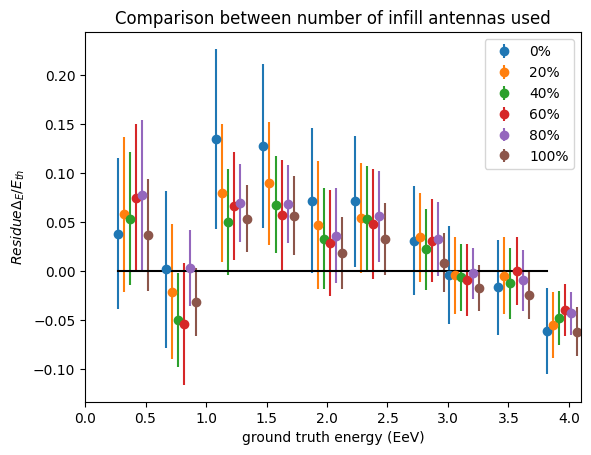

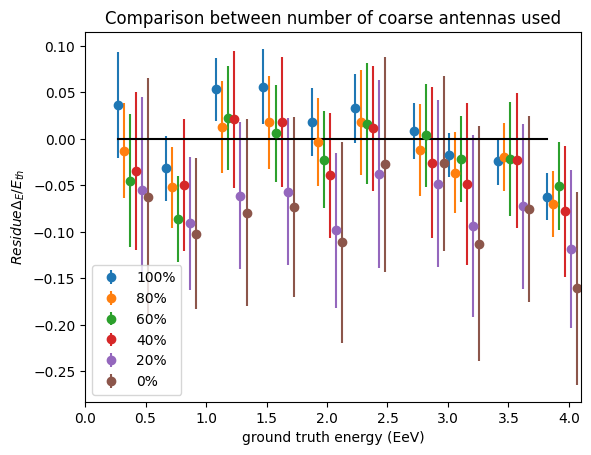

In [24]:
plot_diff(exps_to_load_infill, labels_infill, title=title_infill), plot_diff(exps_to_load_coarse, labels_coarse, title=title_coarse)